#### **尝试利用单层神经网络拟合二次函数**

想法：

已知$f(x) = ax^2 + bx + c$，利用已知的$f(x)$生成一组$(x_i,f(x_i))$  
假设我们仅有生成的$(x_i,f(x_i))$，且知道这一组数据是可以用二次函数进行拟合的，  
那么是否可以把a,b,c当成未知参数，利用MSE_Loss损失函数进行梯度下降法求解a,b,c的最优解？

In [6]:
import numpy as np
import matplotlib.pyplot as plt

(200,) (200,)


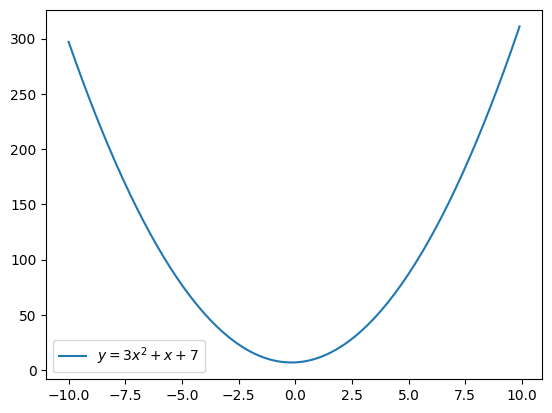

In [7]:
def my_f(x):
    return 3*x**2 + x + 7

# 按已知的数据生成监督数据
x = np.arange(-10,10,0.1)
y_label = np.array(list(my_f(i) for i in x))

print(x.shape,y_label.shape)
plt.plot(x,y_label,label = "$y = 3x^2 + x + 7$")
plt.legend()
plt.show()

In [10]:
# 生成随机参数
params = np.random.rand(3)
print(params)
plt_loss = []

[0.36451247 0.06077652 0.62099864]


epoch0's loss = 129109.40430747013
epoch100's loss = 3840.8229068616474
epoch200's loss = 3346.023581583023
epoch300's loss = 3204.5285073690798
epoch400's loss = 3090.9285801580077
epoch500's loss = 2982.864023291341
epoch600's loss = 2878.68068742738
epoch700's loss = 2778.14323433941
epoch800's loss = 2681.1175164172146
epoch900's loss = 2587.480421914118
epoch1000's loss = 2497.1135725348645
epoch1100's loss = 2409.902753939433
epoch1200's loss = 2325.7377427073607
epoch1300's loss = 2244.5121650708
epoch1400's loss = 2166.1233623383905
epoch1500's loss = 2090.4722611382276
epoch1600's loss = 2017.463248201776
epoch1700's loss = 1947.00404951971
epoch1800's loss = 1879.0056137206034
epoch1900's loss = 1813.3819995209733
epoch2000's loss = 1750.0502671066722
epoch2100's loss = 1688.930373307697
epoch2200's loss = 1629.9450704333608
epoch2300's loss = 1573.0198086419084
epoch2400's loss = 1518.082641718454
epoch2500's loss = 1465.0641361451994
epoch2600's loss = 1413.8972833448802
ep

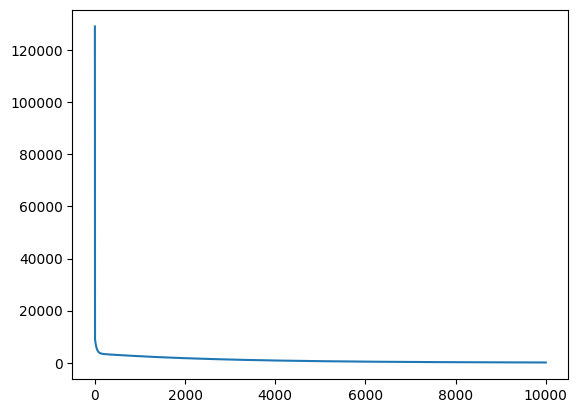

In [11]:
def loss(x):
    """SEloss,即平方和误差"""
    temp = params[0]*x**2 + params[1]*x + params[2]
    # print(temp)
    return np.sum(np.square(y_label - temp))

def train(x):
    lr = 1e-6
    times = 10000
    h = 1e-4
    epoch = 100
    for i in range(times):
        grads = np.zeros_like(params)
        for j in range(len(params)):
            tmp = params[j]
            params[j] = tmp + h
            loss1 = loss(x)
            params[j] = tmp - h
            loss2 = loss(x)
            grads[j] = (loss1 - loss2) / (2 * h)
            params[j] = tmp
        # print(grads)
        for j in range(len(params)):
            params[j] -= lr * grads[j]
        plt_loss.append(loss(x))
        if i % epoch == 0:
            print(f"epoch{i}'s loss = {loss(x)}")

train(x)
plt.plot(np.arange(0,len(plt_loss),1),plt_loss)
plt.show()

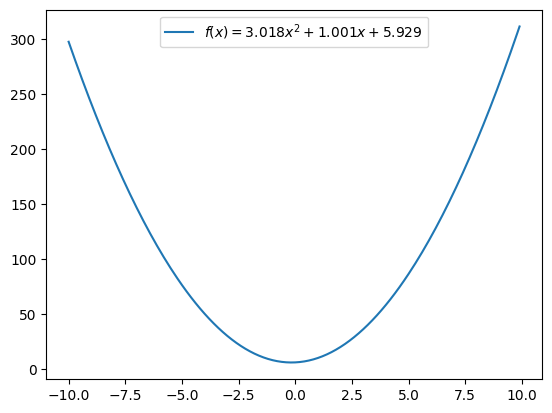

In [12]:
ans_y = params[0]*x**2 + params[1]*x + params[2]
plt.plot(x,ans_y,label = f"$f(x) = {round(params[0],3)}x^2 + {round(params[1],3)}x + {round(params[2],3)}$")
plt.legend()
plt.show()

**收获巨大！！！**

1,当梯度大小的数量级与学习率的倒数相当时，应该降低学习率！！！，否则参数会直接跳大范围，且loss爆炸  
2,故应想办法让梯度不那么大!  
2,平方和损失函数尽量用MSE损失函数取代，即平方和取均值，防止梯度过大! 